In [1]:
!nvidia-smi

Thu Apr  8 08:52:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install numpy==1.16.1

     |████████████████████████████████| 17.3MB 190kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.16.1 which is incompatible.
ERROR: pyarrow 3.0.0 has requirement numpy>=1.16.6, but you'll have numpy 1.16.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: astropy 4.2 has requirement numpy>=1.17, but you'll have numpy 1.16.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [4]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 9.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=7a208f47ad2a8d5a7a79634ded373fb3e7f5c0991c5eeb8dbc1b5cdd2d434e3e
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=46b39ad0af9968682d5e2ed4c459666ac59ab5aaf08e78bdc788ed571aa02c63
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [5]:
import numpy as np                     
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random
import shutil
from sklearn.model_selection import train_test_split

In [6]:
# a single image from the covid19 folder
def load_image(path):
    for img in random.sample(os.listdir(path),1):
        print('Image name =',img)
        image = cv.imread(os.path.join(path, img),cv.IMREAD_UNCHANGED)
        break
        
    return image

Image name = COVID-96.png
The dimensions are 299 pixels height and 299 pixels width
The maximum pixel value is 255.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 135.9998
The standard deviation is 46.0913


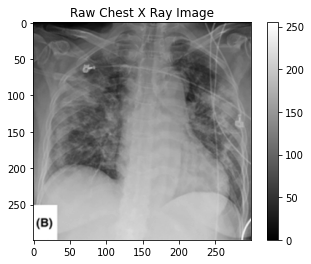

In [7]:
path = '/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID-19'

image = load_image(path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"The standard deviation is {image.std():.4f}")

In [8]:
#shutil.move(src='covid_array.npy',
#            dst='/content/drive/My Drive')

In [9]:
#shutil.move(src='/content/drive/My Drive/COVID-19',
#            dst='/content/drive/My Drive/Main')

In [10]:
labels = ['COVID-19','NORMAL']
print (f'The labels are {labels}')

# setting the size of images that we want

image_size = 224
print(f'All images to be resized into {image_size}*{image_size} pixels')

The labels are ['COVID-19', 'NORMAL']
All images to be resized into 224*224 pixels


In [11]:
# defining a function to load images and labels together
# this function will also resize the images

def load_train(path):
    
    images = []
    
    for label in labels:
        direc = os.path.join(path, label)
        class_num = labels.index(label)
        
        for image in os.listdir(direc):
            image_read = cv.imread(os.path.join(direc,image),cv.IMREAD_COLOR)
            image_resized = cv.resize(image_read,(image_size,image_size))
            images.append([image_resized,class_num])
            
    return np.array(images)

In [12]:
#load all the training images to train_images

#train_images = load_train('/content/drive/MyDrive/COVID-19_Radiography_Dataset')

#print(f'Shape of the training images = {train_images.shape}')

In [13]:
#np.save('/content/drive/My Drive/covid_array.npy',train_images)

In [14]:
train_images = np.load('/content/drive/My Drive/covid_array.npy',allow_pickle=True)

In [15]:
#loading the images and labels seperately in X and y, to be used later for training
X = []
y = []

for feature, label in train_images:
    X.append(feature)
    y.append(label)
    
print (f'Length of X = {len(X)}')
print (f'Length of y = {len(y)}')

Length of X = 13808
Length of y = 13808


Number of covid images = 3616
Number of normal images = 10192


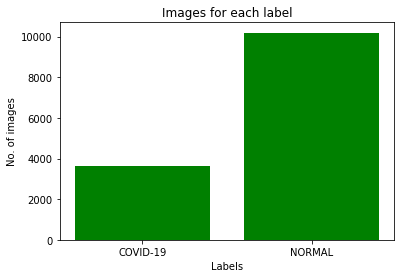

In [16]:
# checking the number of images of each class

a = 0
b = 0

for label in y:
    if label == 0:
        a += 1
    if label == 1:
        b += 1
        
print (f'Number of covid images = {a}')
print (f'Number of normal images = {b}')

# plotting the data

x_pos = [i for i, _ in enumerate(labels)]
numbers = [a,b]
plt.bar(x_pos,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(x_pos, labels)

plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 32, stratify=y)

In [18]:
#checking the difference from the majority class
difference_covid = b-a

print(difference_covid)


6576


In [19]:
def rotate_images(image, scale =1.0, h=224, w = 224):
    
    center = (h/2,w/2)
    
    angle = random.randint(-25,25)
    M = cv.getRotationMatrix2D(center, angle, scale)
    rotated = cv.warpAffine(image, M, (h,w))
    return rotated

def flip (image):
    
    flipped = np.fliplr(image)
    return flipped

def translation (image):
    
    x= random.randint(-50,50)
    y = random.randint(-50,50)
    rows,cols,z = image.shape
    M = np.float32([[1,0,x],[0,1,y]])
    translate = cv.warpAffine(image,M,(cols,rows))
    
    return translate

def blur (image):
    
    x = random.randrange(1,5,2)
    blur = cv.GaussianBlur(image,(x,x),cv.BORDER_DEFAULT)
    return blur

In [20]:
def apply_aug (image):
    
    number = random.randint(1,4)
    
    if number == 1:
        image= rotate_images(image, scale =1.0, h=224, w = 224)
            
    if number == 2:
        image= flip(image)
                
    if number ==3:
        image= translation(image)
                
    if number ==4:
        image= blur(image)
    
    return image

In [21]:
def oversample_images (difference_covid,X_train, y_train):
    
    covid_counter = 0
    new_covid = []
    label_covid = []
    
    for i,item in enumerate (X_train):
        
        if y_train[i] == 0 and covid_counter < difference_covid:
            
            for i in range(2):
               image = apply_aug(item)
            
               covid_counter = covid_counter+1
               label = 0
            
               new_covid.append(image)
               label_covid.append(label)

    
    new_covid= np.array(new_covid)
    label_covid = np.array(label_covid)
    
    return new_covid, label_covid

In [22]:
c_images,c_labels = oversample_images(difference_covid,X_train,y_train)
print(c_images.shape)
print(c_labels.shape)

(5786, 224, 224, 3)
(5786,)


In [23]:
X_train1 = np.append(X_train,c_images[:-526],axis=0)
y_train1 = np.append(y_train,c_labels[:-526])

print(X_train1.shape)
print(y_train1.shape)

(16306, 224, 224, 3)
(16306,)


Number of covid images = 8153
Number of normal images =  8153


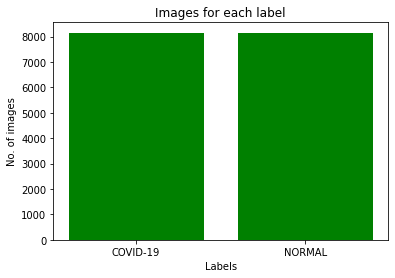

In [24]:
covid_new=0
normal_new=0

for i in y_train1:
    
    if i==0:
        covid_new = covid_new+1
    elif i==1 :
        normal_new = normal_new+1    
        
print ('Number of covid images =',covid_new)
print ('Number of normal images = ',normal_new)

# plotting the data

xe = [i for i, _ in enumerate(labels)]

numbers = [covid_new, normal_new]
plt.bar(xe,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(xe, labels)

plt.show()

Display Random Images


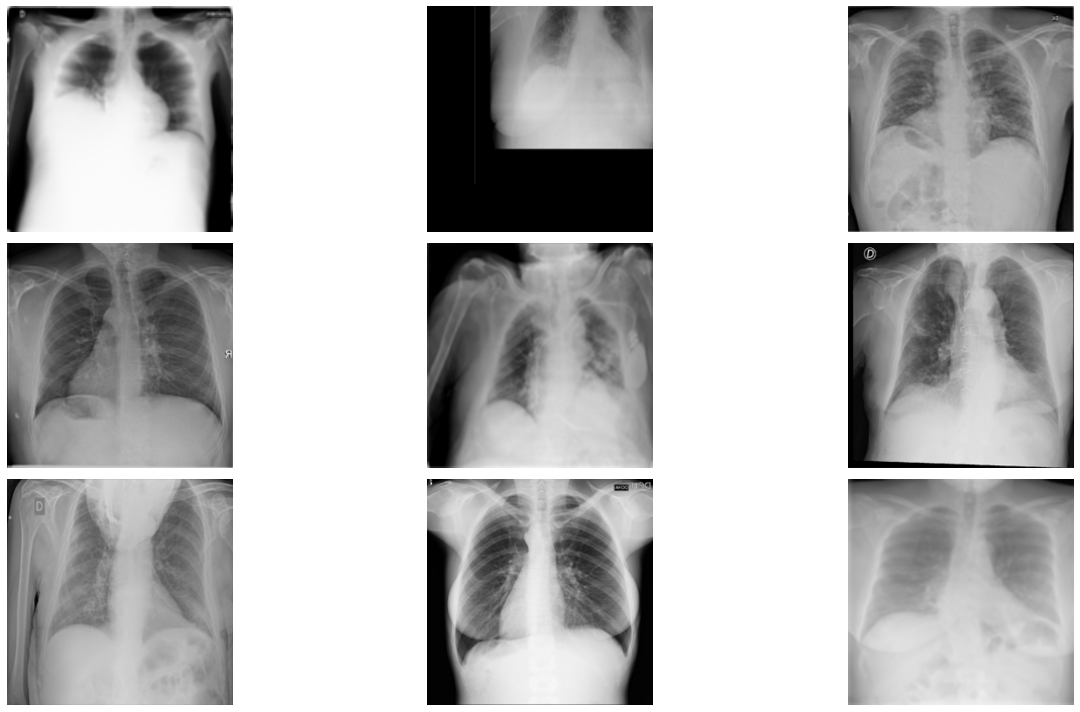

In [25]:
# Displays 9 generated viral images 
# Extract 9 random images
print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

for i in range(9):
    num = random.randint(0,len(c_images)-1)
    plt.subplot(3, 3, i + 1)
    
    plt.imshow(c_images[num],cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()

In [26]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
def build_model(hp):  
  model = Sequential([
       Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(224,224,3)
    ),
    Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    Flatten(),
    Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    Dense(2, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [29]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [30]:
DIM = 224  
EPOCHS = 20
VERBOSE = 2

# Loss parameters
LR = 1e-3  # learning rate with Adam
LOSS_TYPE = "FOCAL" # BCE or FOCAL
GAMMA = 2. # focal loss
ALPHA = 0.8  # focal loss

# Optimizer
OPT_TYPE = "RAdam" # "Adam" or "RAdam"

def get_lr_callback(PLOT_LR = False): # LR scheduler
    lr_start   = 5e-6
    lr_max     = 1.4e-6 * 8
    lr_min     =  1e-6
    lr_ramp_ep = 5
    lr_sus_ep  = 2
    lr_decay   = 0.8
   
    def lrfn(epoch):
        if epoch < lr_ramp_ep:
            lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
            
        elif epoch < lr_ramp_ep + lr_sus_ep:
            lr = lr_max
        else:
            lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
            
        return lr
    if PLOT_LR:
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        plt.plot([lrfn(e) for e in range(EPOCHS)]);
        plt.xlabel('Epoch'); plt.ylabel('LR');
        plt.subplot(1, 2, 2);
        plt.plot([lrfn(e) for e in range(EPOCHS)]);
        plt.xlabel('Epoch'); plt.ylabel('Log LR');
        plt.yscale('log');

    lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=False)
    return lr_callback

In [31]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=4,directory='output',project_name="covid")

In [32]:
model_best = tf.keras.callbacks.ModelCheckpoint("best.h5", monitor='val_auc', verbose=1, save_best_only=True,save_weights_only=True, mode='max', save_freq='epoch')

In [33]:
tuner_search.search(X_train1,y_train1,epochs=3,validation_data=(X_test,y_test),callbacks=[model_best, get_lr_callback()])

Trial 4 Complete [00h 03m 06s]
val_accuracy: 0.8472121357917786

Best val_accuracy So Far: 0.9058653116226196
Total elapsed time: 00h 24m 07s
INFO:tensorflow:Oracle triggered exit


In [34]:
model=tuner_search.get_best_models(num_models=1)[0]

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 128)     3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      73792     
_________________________________________________________________
flatten (Flatten)            (None, 3097600)           0         
_________________________________________________________________
dense (Dense)                (None, 64)                198246464 
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 198,323,970
Trainable params: 198,323,970
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train1,y_train1, epochs = 3, validation_split=0.1)

Epoch 1/3
459/459 [==============================] - 111s 241ms/step - loss: 0.2293 - accuracy: 0.9417 - val_loss: 0.0371 - val_accuracy: 0.9877
Epoch 2/3
459/459 [==============================] - 106s 231ms/step - loss: 0.1048 - accuracy: 0.9669 - val_loss: 0.0356 - val_accuracy: 0.9939
Epoch 3/3
459/459 [==============================] - 106s 231ms/step - loss: 0.0379 - accuracy: 0.9866 - val_loss: 0.0956 - val_accuracy: 0.9718


In [37]:
predictions = model.predict(X_test)

In [38]:
pred = np.argmax(predictions,axis=-1)

In [39]:
print(classification_report(y_pred=pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       723
           1       0.97      0.95      0.96      2039

    accuracy                           0.94      2762
   macro avg       0.92      0.93      0.93      2762
weighted avg       0.94      0.94      0.94      2762



In [40]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,pred)
cf_matrix

array([[ 660,   63],
       [  96, 1943]])

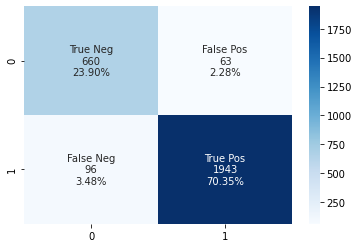

In [41]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [47]:
#model.save("/content/drive/MyDrive/covid-19 models/std_cnn_model.h5")

In [42]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [43]:
vgg = VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [52]:
for layer in vgg.layers:
  layer.trainable = False

In [53]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

In [54]:
model_vgg = Model(inputs=vgg.input, outputs=prediction)

In [55]:
model_vgg.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [58]:
model_vgg.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [59]:
model_vgg.fit(X_train1,y_train1, epochs = 3, validation_data=(X_test,y_test),callbacks=[model_best, get_lr_callback()])

Epoch 1/3
510/510 [==============================] - 80s 156ms/step - loss: 0.6990 - accuracy: 0.8823 - val_loss: 0.7387 - val_accuracy: 0.8881
Epoch 2/3
510/510 [==============================] - 79s 155ms/step - loss: 0.5151 - accuracy: 0.9090 - val_loss: 0.6155 - val_accuracy: 0.8993
Epoch 3/3
510/510 [==============================] - 79s 155ms/step - loss: 0.3635 - accuracy: 0.9328 - val_loss: 0.4899 - val_accuracy: 0.9232


In [60]:
predictions = model_vgg.predict(X_test)

In [61]:
pred_vgg = np.argmax(predictions,axis=-1)

In [62]:
print(classification_report(y_pred=pred_vgg,y_true=y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       723
           1       0.95      0.94      0.95      2039

    accuracy                           0.92      2762
   macro avg       0.90      0.91      0.90      2762
weighted avg       0.92      0.92      0.92      2762



In [63]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,pred_vgg)
cf_matrix

array([[ 628,   95],
       [ 117, 1922]])

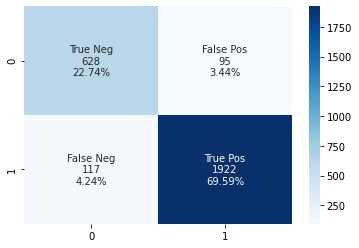

In [64]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [70]:
#model_vgg.save('/content/drive/MyDrive/covid-19 models/model_vgg.h5')

In [65]:
from keras.applications.resnet import ResNet50

In [66]:
resnet = ResNet50(input_shape=[224,224,3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [67]:
for layer in resnet.layers:
  layer.trainable = False

In [68]:
x = Flatten()(resnet.output)
prediction = Dense(2, activation='softmax')(x)

In [69]:
model_resnet = Model(inputs=resnet.input, outputs=prediction)

In [73]:
model_resnet.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [72]:
model_resnet.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [77]:
model_resnet.fit(X_train1,y_train1, epochs = 3, validation_data=(X_test,y_test),callbacks=[get_lr_callback()])

Epoch 1/2
510/510 [==============================] - 58s 115ms/step - loss: 0.2373 - accuracy: 0.9209 - val_loss: 0.2366 - val_accuracy: 0.9225
Epoch 2/2
510/510 [==============================] - 57s 112ms/step - loss: 0.1448 - accuracy: 0.9462 - val_loss: 0.1607 - val_accuracy: 0.9442


In [78]:
predictions = model_resnet.predict(X_test)

In [79]:
pred_resnet = np.argmax(predictions,axis=-1)

In [80]:
print(classification_report(y_pred=pred_resnet,y_true=y_test))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       723
           1       0.97      0.95      0.96      2039

    accuracy                           0.94      2762
   macro avg       0.92      0.94      0.93      2762
weighted avg       0.95      0.94      0.94      2762



In [81]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,pred_vgg)
cf_matrix

array([[ 628,   95],
       [ 117, 1922]])

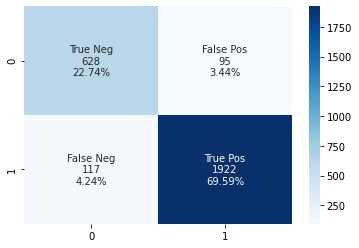

In [82]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [116]:
#model_resnet.save('/content/drive/MyDrive/covid-19 models/model_resnet50.h5')

In [83]:
from keras.applications.densenet import DenseNet121

In [84]:
densenet = DenseNet121(input_shape=[224,224,3], weights='imagenet', include_top=False)

29089792/29084464 [==============================] - 0s 0us/step


In [85]:
for layer in densenet.layers:
  layer.trainable = False

In [86]:
x = Flatten()(densenet.output)
prediction = Dense(2, activation='softmax')(x)

In [87]:
model_densenet = Model(inputs=densenet.input, outputs=prediction)

In [88]:
model_densenet.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [89]:
model_densenet.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [91]:
model_densenet.fit(X_train1,y_train1, epochs = 3, validation_data=(X_test,y_test),callbacks=[get_lr_callback()])

Epoch 1/3
510/510 [==============================] - 66s 114ms/step - loss: 1.4254 - accuracy: 0.6848 - val_loss: 0.4959 - val_accuracy: 0.8371
Epoch 2/3
510/510 [==============================] - 54s 106ms/step - loss: 0.3979 - accuracy: 0.8645 - val_loss: 0.3178 - val_accuracy: 0.8917
Epoch 3/3
510/510 [==============================] - 54s 105ms/step - loss: 0.2594 - accuracy: 0.9100 - val_loss: 0.2590 - val_accuracy: 0.9127


In [92]:
predictions = model_densenet.predict(X_test)
pred_densenet = np.argmax(predictions,axis=-1)

In [93]:
print(classification_report(y_pred=pred_densenet,y_true=y_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       723
           1       0.96      0.92      0.94      2039

    accuracy                           0.91      2762
   macro avg       0.88      0.91      0.89      2762
weighted avg       0.92      0.91      0.91      2762



In [94]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,pred_densenet)
cf_matrix

array([[ 643,   80],
       [ 161, 1878]])

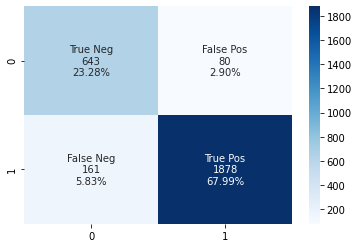

In [95]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [115]:
model_densenet.save('/content/drive/MyDrive/covid-19 models/model_densenet_121.h5')

In [96]:
from keras.applications.densenet import DenseNet201

In [97]:
densenet_201 = DenseNet201(input_shape=[224,224,3], weights='imagenet', include_top=False)

74842112/74836368 [==============================] - 1s 0us/step


In [98]:
for layer in densenet_201.layers:
  layer.trainable = False

In [99]:
x = Flatten()(densenet_201.output)
prediction = Dense(2, activation='softmax')(x)

In [100]:
model_densenet_201 = Model(inputs=densenet_201.input, outputs=prediction)

In [101]:
model_densenet_201.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [103]:
model_densenet_201.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [106]:
model_densenet_201.fit(X_train1,y_train1, epochs = 3, validation_data=(X_test,y_test),callbacks=[get_lr_callback()])

Epoch 1/3
510/510 [==============================] - 89s 175ms/step - loss: 4.2872 - accuracy: 0.7073 - val_loss: 0.4566 - val_accuracy: 0.8139
Epoch 2/3
510/510 [==============================] - 84s 164ms/step - loss: 0.3507 - accuracy: 0.8552 - val_loss: 0.3353 - val_accuracy: 0.8563
Epoch 3/3
510/510 [==============================] - 84s 164ms/step - loss: 0.2552 - accuracy: 0.8949 - val_loss: 0.2424 - val_accuracy: 0.9041


In [107]:
predictions = model_densenet.predict(X_test)
pred_densenet_201 = np.argmax(predictions,axis=-1)

In [108]:
print(classification_report(y_pred=pred_densenet_201,y_true=y_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       723
           1       0.96      0.92      0.94      2039

    accuracy                           0.91      2762
   macro avg       0.88      0.91      0.89      2762
weighted avg       0.92      0.91      0.91      2762



In [109]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,pred_densenet)
cf_matrix

array([[ 643,   80],
       [ 161, 1878]])

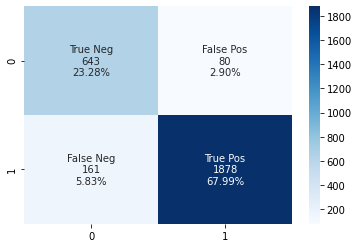

In [110]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [114]:
#model_densenet_201.save('/content/drive/MyDrive/covid-19 models/model_densenet_201.h5')

In [111]:
from sklearn.metrics import auc,roc_curve

In [112]:
std_cnn_fpr , std_cnn_tpr , threshold = roc_curve(y_test,pred)
std_auc = auc(std_cnn_fpr,std_cnn_tpr)

vgg_fpr , vgg_tpr , threshold = roc_curve(y_test,pred_vgg)
vgg_auc = auc(vgg_fpr,vgg_tpr)

resnet_fpr , resnet_tpr , threshold = roc_curve(y_test,pred_resnet)
resnet_auc = auc(resnet_fpr,resnet_tpr)

densenet_fpr , densenet_tpr , threshold = roc_curve(y_test,pred_densenet)
densenet_auc = auc(densenet_fpr,densenet_tpr)

densenet201_fpr , densenet201_tpr , threshold = roc_curve(y_test,pred_densenet_201)
densenet201_auc = auc(densenet201_fpr,densenet201_tpr)

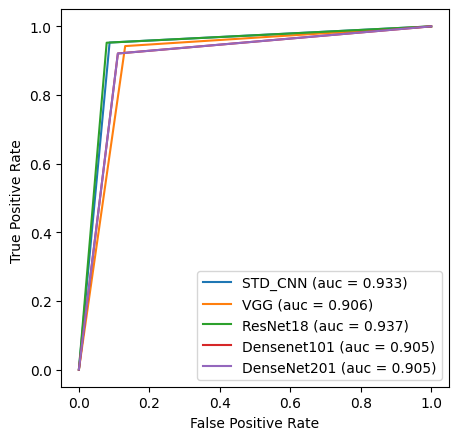

In [113]:
plt.figure(figsize=(5,5),dpi=100)

plt.plot(std_cnn_fpr,std_cnn_tpr,linestyle='-',label='STD_CNN (auc = %0.3f)' % std_auc)
plt.plot(vgg_fpr,vgg_tpr,linestyle='-',label='VGG (auc = %0.3f)' % vgg_auc)
plt.plot(resnet_fpr,resnet_tpr,linestyle='-',label='ResNet18 (auc = %0.3f)' % resnet_auc)
plt.plot(densenet_fpr,densenet_tpr,linestyle='-',label='Densenet101 (auc = %0.3f)' % densenet_auc)
plt.plot(densenet201_fpr,densenet201_tpr,linestyle='-',label='DenseNet201 (auc = %0.3f)' % densenet201_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')

plt.legend()

plt.show()